___
# Ciência dos Dados - PROJETO 1

## Carla Kim Gaieski
___

## As gerações no mundo moderno

___
## Introdução


No século XX o mundo sofreu uma revolução tecnológica. Novas tecnologias foram introduzidas à nossas vidas e, de certa forma, cada vez mais nos fazemos dependente dela. Assim, as novas gerações, principalemte a Z, e parte da Y, de fachetaria mais jovem nasceram já imergidas nesse mundo tecnológico. Por isso, possuem mais afinidade e facilidade em mexer com eletrônicos, que os mais velhos. No entanto, agora, adultos e anciões estão se mordenizando mais rapidamente. Assim, há um crescente uso de eletrônicos entre os mais velhos, tanto é que existem aulas próprias para o ensino de como mexer nos equipamentos. Por outro lado, as crianças, até bebês, possuem seus próprios aparelhos digitais, que se tornou o único meio de entreterimento deles.
Com isso, irei analisar o acesso à internet entre diferentes gerações em cada unidade de federação, diferenciando, também, entre homens e mulheres.

___
## Filtros da base de dados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Carla Kim\Downloads


In [4]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

Criando meu data frame:

In [5]:
dados = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

df = pd.DataFrame({'Unidade de federação' : dados.UF,
                   'O acesso à Internet foi feito através de telefone celular': dados.V061113,
                    'O acesso à Internet foi feito através de tablet': dados.V061114,
                    'O acesso à Internet foi feito através de outro equipamento eletrônico': dados.V061116,
                   'Tem telefone móvel celular para uso pessoal':dados.V06112,
                   'Sexo': dados.V0302,
                    'Idade do morador na data de referência': dados.V8005})

df.to_csv('Projeto1CDDP.csv')

Arrumando o dataframe:

In [6]:
df['Unidade de federação']= df['Unidade de federação'].astype('category')
df['Unidade de federação'].cat.categories = ('Rondônia', 'Acre',
                              'Amazonas', 'Roraima', 
                              'Pará','Amapá','Tocantins',
                              'Maranhão','Piauí','Ceará',
                            'Rio Grande do Norte','Paraíba',
                            'Pernambuco','Alagoas', 'Sergipe',
                            'Bahia','Minas Gerais','Espírito Santo',
                            'Rio de Janeiro', 'São Paulo', 'Paraná',
                            'Santa Catarina','Rio Grande do Sul',
                            'Mato Grosso do Sul', 'Mato Grosso', 'Goiás',
                            'Distrito Federal')

df['Sexo']= df['Sexo'].astype('category')
df['Sexo'].cat.categories = ('Masculino','Feminino')

df['O acesso à Internet foi feito através de telefone celular']= df['O acesso à Internet foi feito através de telefone celular'].astype('category')
df['O acesso à Internet foi feito através de telefone celular'].cat.categories = ('Sim','Não')

df['O acesso à Internet foi feito através de tablet']= df['O acesso à Internet foi feito através de tablet'].astype('category')
df['O acesso à Internet foi feito através de tablet'].cat.categories = ('Sim','Não')

df['O acesso à Internet foi feito através de outro equipamento eletrônico']= df['O acesso à Internet foi feito através de outro equipamento eletrônico'].astype('category')
df['O acesso à Internet foi feito através de outro equipamento eletrônico'].cat.categories = ('Sim','Não')

df['Tem telefone móvel celular para uso pessoal']= df['Tem telefone móvel celular para uso pessoal'].astype('category')
df['Tem telefone móvel celular para uso pessoal'].cat.categories = ('Sim','Não')


df.head()

,Idade do morador na data de referência,O acesso à Internet foi feito através de outro equipamento eletrônico,O acesso à Internet foi feito através de tablet,O acesso à Internet foi feito através de telefone celular,Sexo,Tem telefone móvel celular para uso pessoal,Unidade de federação
0,23,Não,Não,Sim,Masculino,Sim,Rondônia
1,23,Não,Não,Sim,Feminino,Sim,Rondônia
2,35,Não,Não,Sim,Feminino,Sim,Rondônia
3,34,Não,Não,Sim,Masculino,Sim,Rondônia
4,11,Não,Não,Não,Feminino,Sim,Rondônia


___
## Análise e Resultados

Aqui estou expondo os valores absolutos, para poder exergar melhor a situação de meus dados

In [7]:
df['O acesso à Internet foi feito através de telefone celular'].value_counts(True)*100

Sim    88.014651
Não    11.985349
Name: O acesso à Internet foi feito através de telefone celular, dtype: float64

In [8]:
df['O acesso à Internet foi feito através de tablet'].value_counts(True)*100

Não    85.018865
Sim    14.981135
Name: O acesso à Internet foi feito através de tablet, dtype: float64

In [9]:
df['Sexo'].value_counts(True)*100

Feminino     51.4651
Masculino    48.5349
Name: Sexo, dtype: float64

In [10]:
df['Tem telefone móvel celular para uso pessoal'].value_counts(True)*100

Sim    78.88684
Não    21.11316
Name: Tem telefone móvel celular para uso pessoal, dtype: float64

In [11]:
#df['Unidade de federação'].value_counts(True)*100

In [12]:
#df['Idade do morador na data de referência'].value_counts(True)*100

Criando faixa-etárias para classificar a sociedade de acordo com a idade:

In [20]:
def faixasidade(df):
    x=df['V8005']
    if x<10: return 1
    elif x<=30: return 2
    elif x<60: return 3
    elif x>=60: return 4
    return 5
faixas=dados.apply(faixasidade,axis=1)
df['faixas']=faixas
df.faixas=df.faixas.astype('category')
df.faixas.cat.categories=(['Crianças','Jovens','Adultos','Idosos'])

In [21]:
df.head()

,Idade do morador na data de referência,O acesso à Internet foi feito através de outro equipamento eletrônico,O acesso à Internet foi feito através de tablet,O acesso à Internet foi feito através de telefone celular,Sexo,Tem telefone móvel celular para uso pessoal,Unidade de federação,faixas,Regiaobr
0,23,Não,Não,Sim,Masculino,Sim,Rondônia,Jovens,Norte
1,23,Não,Não,Sim,Feminino,Sim,Rondônia,Jovens,Norte
2,35,Não,Não,Sim,Feminino,Sim,Rondônia,Adultos,Norte
3,34,Não,Não,Sim,Masculino,Sim,Rondônia,Adultos,Norte
4,11,Não,Não,Não,Feminino,Sim,Rondônia,Jovens,Norte


In [22]:
ct = pd.crosstab(df['faixas'], df['Sexo'])
ct

Sexo,Masculino,Feminino
faixas,,
Crianças,24804,23501
Jovens,60299,58996
Adultos,66430,73654
Idosos,21690,27530


Criando as regiões do Brasil:

In [23]:
def regiao(df):
    es=df['UF']
    if es <= 17: return 1
    elif es <= 29: return 2
    elif es <= 35: return 3
    elif es <= 43: return 4
    elif es >= 50: return 5
    return 6
reg=dados.apply(regiao,axis=1)
df['Regiaobr'] = reg
df.Regiaobr=df.Regiaobr.astype('category')
df.Regiaobr.cat.categories=(['Norte','Nordeste','Sudeste','Sul','Centro-Oeste'])


In [49]:
ct2 = pd.crosstab(df['faixas'], df['Regiaobr'])

In [44]:
#crosstab entre se tem telefone pessoal e regiao  do brasil
ct3 = pd.crosstab(df['Tem telefone móvel celular para uso pessoal'], df['Regiaobr'])
ct3

Regiaobr,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
Tem telefone móvel celular para uso pessoal,,,,,
Sim,34044,64453,76672,40355,27920
Não,13588,23745,16057,7639,4126


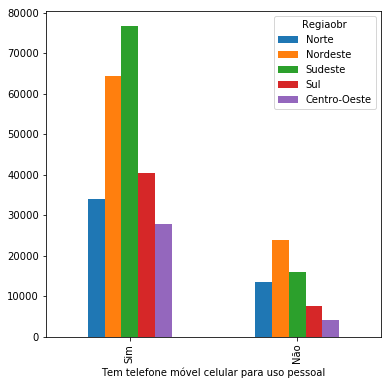

In [62]:
plot = ct3.plot(kind='bar',figsize=(6, 6))
plt.show()

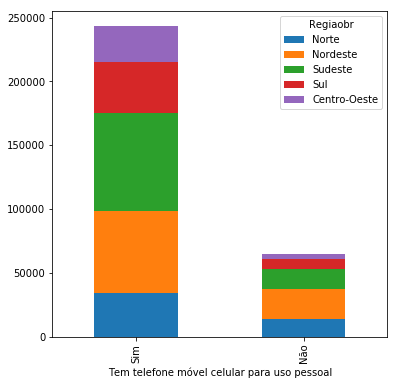

In [63]:
plot2 = ct3.plot(kind='bar',figsize=(6, 6), stacked=True)
plt.show()

In [47]:
#crosstab entre se tem telefone pessoal e unidade de federacao
ct4 = pd.crosstab(df['Tem telefone móvel celular para uso pessoal'], df['Unidade de federação'])

___
## Conclusão 

Descreva aqui suas conclusões!